<div style="background: #DDE2FF;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 20px 5px 0px 5px; 
            border: 10px solid #DDE2FF; 
            margin-left: 1px;
            margin-right: 1px;"
          
 <font color='blue'>**Trefethen p01 to p14**.
 
 This notebook showcases the first ten problems in Trefethen's classic book _Spectral Methods in MATLAB_. These problems have been ported to Python by Praveen Chandrashekar. Later problems in the set will have been ported to Python by Orlando Camargo Rodríguez. <br><br>
 
 

    
</font>
</div>



<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Program 1 : Convergence of fourth order finite differences


</font>
</div>



<div style="background: #FFE3CC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 15px 5px 10px 5px;
            border: 10px solid #FFE3CC;  
            margin-left: 1px;
            margin-right: 1px;"
     
<font color='blue'>Compute the derivative of
$$
u(x) = \exp(\sin(x)), \qquad x \in [-\pi,\pi]
$$
using fourth order finite difference scheme
$$
u'(x_j) \approx w_j = \frac{1}{h} \left( \frac{1}{12} u_{j-2} - \frac{2}{3} u_{j-1} + \frac{2}{3} u_{j+1} - \frac{1}{12} u_{j+2} \right)
$$
using periodic boundary conditions.
</font>
</div>

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
from scipy.sparse import coo_matrix
from numpy import arange,pi,exp,sin,cos,ones,inf
from numpy.linalg import norm
from matplotlib.pyplot import figure,loglog,semilogy,text,grid,xlabel,ylabel,title

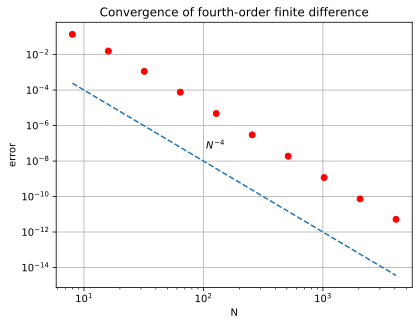

In [2]:
Nvec = 2**arange(3,13)
for N in Nvec:
    h = 2*pi/N
    x = -pi + arange(1,N+1)*h
    u = exp(sin(x))
    uprime = cos(x)*u
    e = ones(N)
    e1 = arange(0,N)
    e2 = arange(1,N+1); e2[N-1]=0
    e3 = arange(2,N+2); e3[N-2]=0; e3[N-1]=1;
    D = coo_matrix((2*e/3,(e1,e2)),shape=(N,N)) \
        - coo_matrix((e/12,(e1,e3)),shape=(N,N))
    D = (D - D.T)/h
    error = norm(D.dot(u)-uprime,inf)
    loglog(N,error,'or')
    #hold(True)
    
semilogy(Nvec,Nvec**(-4.0),'--')
text(105,5e-8,'$N^{-4}$')
grid(True)
xlabel('N')
ylabel('error')
title('Convergence of fourth-order finite difference');



<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Program 2 : Convergence of periodic spectral method


</font>
</div>


<div style="background: #FFE3CC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 15px 5px 10px 5px;
            border: 10px solid #FFE3CC;  
            margin-left: 1px;
            margin-right: 1px;"
     
<font color='blue'>Repeat Program 1 using periodic spectral method to compute derivative of

$$
u(x) = \exp(\sin(x)), \qquad x \in [-\pi,\pi]
$$
</font>
</div>

In [4]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
from scipy.linalg import toeplitz
from numpy import pi,arange,exp,sin,cos,zeros,tan,inf
from numpy.linalg import norm
from matplotlib.pyplot import figure,loglog,grid,xlabel,ylabel



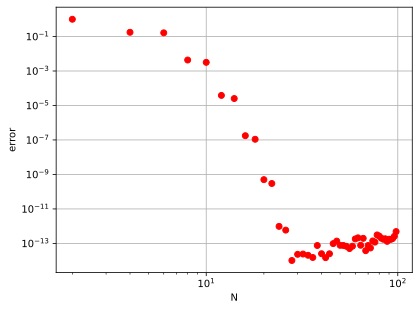

In [5]:
figure()
for N in range(2,100,2):
    h = 2.0*pi/N
    x = -pi + arange(1,N+1)*h
    u = exp(sin(x))
    uprime = cos(x)*u #Exact derivative
    col = zeros(N)
    col[1:] = 0.5*(-1.0)**arange(1,N)/tan(arange(1,N)*h/2.0)
    row = zeros(N); row[0] = col[0]; row[1:] = col[N-1:0:-1]
    D = toeplitz(col,row)
    error = norm(D.dot(u)-uprime,inf)
    loglog(N,error,'or')
    
grid(True)
xlabel('N')
ylabel('error');



<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Program 3 : Band-limited interpolation


</font>
</div>

<div style="background: #FFE3CC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 15px 5px 10px 5px;
            border: 10px solid #FFE3CC;  
            margin-left: 1px;
            margin-right: 1px;"
     
<font color='blue'>Interpolate the following functions using band limited interpolation on an infinite grid.

Delta function
$$
v(x) = \begin{cases}
1 & x =0 \\
0 & otherwise
\end{cases}
$$

Square wave
$$
v(x) = \begin{cases}
1 & |x| \le 3 \\
0 & otherwise
\end{cases}
$$

Hat function
$$
v(x) = \max(0, 1-|x|/3)
$$

Since all functions are zero away from origin, restrict them to some finite interval, say $[-10,10]$.
</font>
</div>

In [6]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
from numpy import arange,maximum,abs,zeros,sin,pi
from matplotlib.pyplot import subplot,figure,plot,grid,axis



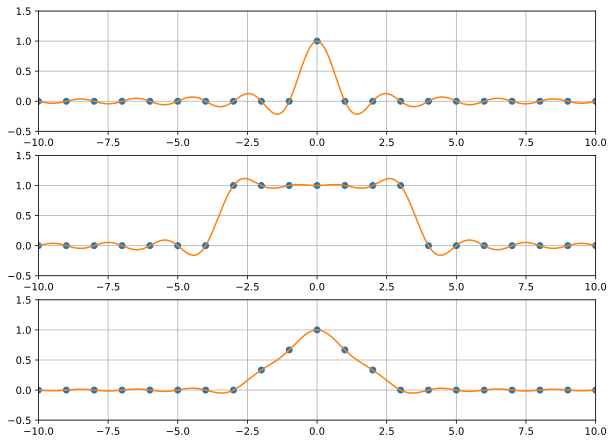

In [7]:
h = 1.0;
xmax = 10.0;
x = arange(-xmax,xmax+h,h)
xx = arange(-xmax-h/20, xmax+h/20, h/10)
figure(figsize=(10,10))
for pl in range(3):
    subplot(4,1,pl+1)
    if pl==0:
        v = (x==0)                      # delta function
    elif pl==1:
        v = (abs(x) <= 3.0)             # square wave
    else:
        v = maximum(0.0,1.0-abs(x)/3.0) # hat function
    plot(x,v,'o')
    grid(True)
    p = zeros(len(xx))
    for i in range(len(x)):
        p = p + v[i]*sin(pi*(xx-x[i])/h)/(pi*(xx-x[i])/h)
    plot(xx,p)
    axis([-xmax,xmax,-0.5,1.5]);
    
    

<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Program 4 : Periodic spectral differentiation

Compute derivatives of following periodic functions on a finite interval
$$
v(x) = \max(0, 1-|x-\pi|/2), \qquad x \in [0,2\pi]
$$
and
$$
v(x) = \exp(\sin(x)), \qquad x \in [0,2\pi]
$$


</font>
</div>

<div style="background: #FFE3CC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 15px 5px 10px 5px;
            border: 10px solid #FFE3CC;  
            margin-left: 1px;
            margin-right: 1px;"
     
<font color='blue'>Compute derivatives of the following periodic functions on the finite interval

$$
v(x) = \max(0, 1-|x-\pi|/2), \qquad x \in [0,2\pi]
$$
and
$$
v(x) = \exp(\sin(x)), \qquad x \in [0,2\pi]
$$

</font>
</div>

In [8]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
from numpy import pi,inf,linspace,zeros,arange,sin,cos,tan,exp,maximum,abs
from numpy.linalg import norm
from scipy.linalg import toeplitz
from matplotlib.pyplot import figure,subplot,plot,axis,title,text



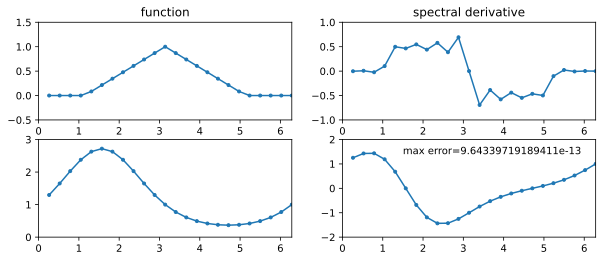

In [9]:
# Set up grid and differentiation matrix:
N = 24; h = 2*pi/N; x = h*arange(1,N+1);
col = zeros(N)
col[1:] = 0.5*(-1.0)**arange(1,N)/tan(arange(1,N)*h/2.0)
row = zeros(N)
row[0] = col[0]
row[1:] = col[N-1:0:-1]
D = toeplitz(col,row)

figure(figsize=(10,6))

# Differentiation of a hat function:
v = maximum(0,1-abs(x-pi)/2)
subplot(3,2,1)
plot(x,v,'.-')
axis([0, 2*pi, -.5, 1.5])
title('function')
subplot(3,2,2)
plot(x,D.dot(v),'.-')
axis([0, 2*pi, -1, 1])
title('spectral derivative')

# Differentiation of exp(sin(x)):
v = exp(sin(x)); vprime = cos(x)*v;
subplot(3,2,3)
plot(x,v,'.-')
axis([0, 2*pi, 0, 3])
subplot(3,2,4)
plot(x,D.dot(v),'.-')
axis([0, 2*pi, -2, 2])
error = norm(D.dot(v)-vprime,inf)
text(1.5,1.4,"max error="+str(error));



<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Program 5 : Repetition of Program 4 via FFT


</font>
</div>

In [10]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
#  For complex v, delete "real" commands.
from numpy import pi,inf,linspace,maximum,abs,zeros,arange,real,sin,cos,exp
from numpy.fft import fft,ifft
from numpy.linalg import norm
from matplotlib.pyplot import figure,subplot,plot,axis,title,text



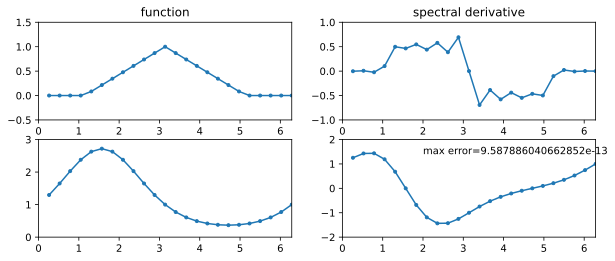

In [11]:
# Set up grid and differentiation matrix:
N = 24; h = 2*pi/N; x = h*arange(1,N+1);

# Differentiation of a hat function:
v = maximum(0.0,1.0-abs(x-pi)/2.0)
v_hat = fft(v)
w_hat = 1j*zeros(N)
w_hat[0:N//2] = 1j*arange(0,N//2)
w_hat[N//2+1:] = 1j*arange(-N//2+1,0,1)
w_hat = w_hat * v_hat
w = real(ifft(w_hat))

figure(figsize=(10,6))

subplot(3,2,1)
plot(x,v,'.-')
axis([0, 2*pi, -.5, 1.5])
title('function')
subplot(3,2,2)
plot(x,w,'.-')
axis([0, 2*pi, -1, 1])
title('spectral derivative')

# Differentiation of exp(sin(x)):
v = exp(sin(x)); vprime = cos(x)*v;
v_hat = fft(v)
w_hat = 1j*zeros(N)
w_hat[0:N//2] = 1j*arange(0,N//2)
w_hat[N//2+1:] = 1j*arange(-N//2+1,0,1)
w_hat = w_hat * v_hat
w = real(ifft(w_hat))
subplot(3,2,3)
plot(x,v,'.-')
axis([0, 2*pi, 0, 3])
subplot(3,2,4)
plot(x,w,'.-')
axis([0, 2*pi, -2, 2])
error = norm(w-vprime,inf)
text(2.0,1.4,"max error="+str(error));



<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Program 6 : Variable coefficient wave equation


</font>
</div>

In [12]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import LineCollection
from numpy import pi,linspace,sin,exp,round,zeros,arange,real
from numpy.fft import fft,ifft
from matplotlib.pyplot import figure



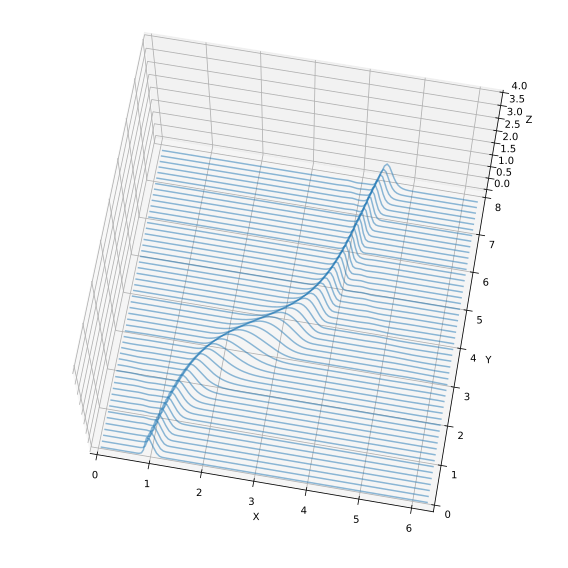

In [13]:
# Set up grid and differentiation matrix:
N = 128; h = 2*pi/N; x = h*arange(1,N+1);
t = 0.0; dt = h/4.0
c = 0.2 + sin(x-1.0)**2.0
v = exp(-100.0*(x-1.0)**2.0); vold = exp(-100.0*(x-0.2*dt-1.0)**2.0);

# Time-stepping by leap-frog formula
tmax = 8.0; tplot = 0.15;
plotgap = int(round(tplot/dt)); dt = tplot/plotgap;
nplots = int(round(tmax/tplot))
data = []
data.append(list(zip(x, v)))
tdata = []; tdata.append(0.0)
for i in range(1,nplots):
    for n in range(plotgap):
        t = t + dt
        v_hat = fft(v)
        w_hat = 1j*zeros(N)
        w_hat[0:N//2] = 1j*arange(0,N//2)
        w_hat[N//2+1:] = 1j*arange(-N//2+1,0,1)
        w_hat = w_hat * v_hat
        w = real(ifft(w_hat))
        vnew = vold - 2.0*dt*c*w
        vold = v; v = vnew;
    data.append(list(zip(x, v)))
    tdata.append(t);

fig = figure(figsize=(12,10))
ax = fig.add_subplot(111,projection='3d')
poly = LineCollection(data)
poly.set_alpha(0.5)
ax.add_collection3d(poly, zs=tdata, zdir='y')
ax.set_xlabel('X')
ax.set_xlim3d(0, 2*pi)
ax.set_ylabel('Y')
ax.set_ylim3d(0, 8)
ax.set_zlabel('Z')
ax.set_zlim3d(0, 4)
ax.view_init(70,-80)



<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Program 7 : Accuracy of periodic spectral differentiation


</font>
</div>

In [15]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
from numpy import zeros,pi,inf,linspace,arange,tan,sin,cos,exp,abs,dot
from scipy.linalg import toeplitz,norm
from matplotlib.pyplot import figure,subplot,semilogy,title,xlabel,ylabel,axis



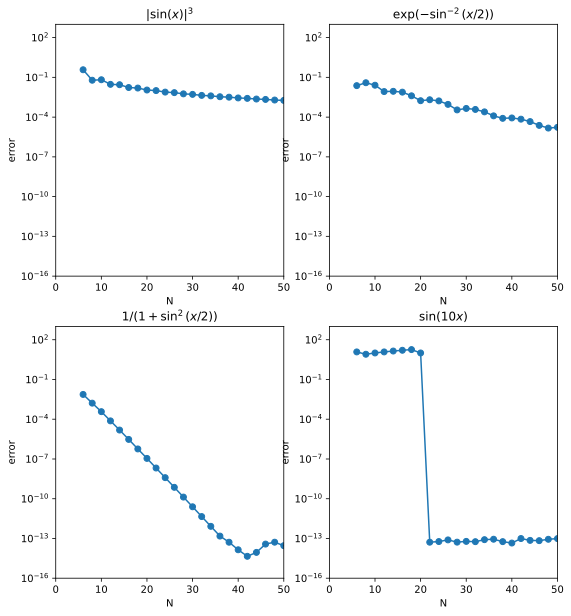

In [16]:
# Set up grid and differentiation matrix:
Nmax = 50
E = zeros((4,Nmax//2-2))
for N in range(6,Nmax+1,2):
    h = 2.0*pi/N; x = h*linspace(1,N,N);
    col = zeros(N)
    col[1:] = 0.5*(-1.0)**arange(1,N)/tan(arange(1,N)*h/2.0)
    row = zeros(N)
    row[0] = col[0]
    row[1:] = col[N-1:0:-1]
    D = toeplitz(col,row)
    
    v = abs(sin(x))**3
    vprime = 3.0*sin(x)*cos(x)*abs(sin(x))
    E[0][N//2-3] = norm(dot(D,v)-vprime,inf)
    
    v = exp(-sin(x/2)**(-2))   # C-infinity
    vprime = 0.5*v*sin(x)/sin(x/2)**4
    E[1][N//2-3] = norm(dot(D,v)-vprime,inf)
    
    v = 1.0/(1.0+sin(x/2)**2)     # analytic in a strip
    vprime = -sin(x/2)*cos(x/2)*v**2
    E[2][N//2-3] = norm(dot(D,v)-vprime,inf)
    
    v = sin(10*x)
    vprime = 10*cos(10*x)   # band-limited
    E[3][N//2-3] = norm(dot(D,v)-vprime,inf)


titles = ["$|\sin(x)|^3$", "$\exp(-\sin^{-2}(x/2))$", \
          "$1/(1+\sin^2(x/2))$", "$\sin(10x)$"]
figure(figsize=(9,10))
for iplot in range(4):
    subplot(2,2,iplot+1)
    semilogy(arange(6,Nmax+1,2),E[iplot][:],'o-')
    title(titles[iplot])
    xlabel('N')
    ylabel('error')
    axis([0,Nmax,1.0e-16,1.0e3])
    
    

<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Program 8 : Eigenvalues of harmonic oscillator


</font>
</div>

In [17]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
from numpy import pi,arange,linspace,sin,zeros,diag,sort
from scipy.linalg import toeplitz
from numpy.linalg import eig



In [18]:
L = 8.0
for N in range(6,37,6):
    h = 2.0*pi/N; x = h*linspace(1,N,N); x = L*(x-pi)/pi
    col = zeros(N)
    col[0] = -pi**2/(3.0*h**2) - 1.0/6.0
    col[1:] = -0.5*(-1.0)**arange(1,N)/sin(0.5*h*arange(1,N))**2
    D2 = (pi/L)**2 * toeplitz(col)
    evals,evecs = eig(-D2 + diag(x**2))
    eigenvalues = sort(evals)
    print("N = %d" % N)
    for e in eigenvalues[0:4]:
        print("%24.15e" % e)
        
        

N = 6
   4.614729169954764e-01
   7.494134621050522e+00
   7.720916053006566e+00
   2.883248377834012e+01
N = 12
   9.781372812986080e-01
   3.171605320647181e+00
   4.455935291166790e+00
   8.924529058119932e+00
N = 18
   9.999700014993074e-01
   3.000644066795830e+00
   4.992595324407721e+00
   7.039571897981504e+00
N = 24
   9.999999976290295e-01
   3.000000098410861e+00
   4.999997965273278e+00
   7.000024998156540e+00
N = 30
   9.999999999999769e-01
   3.000000000000747e+00
   4.999999999975587e+00
   7.000000000508622e+00
N = 36
   1.000000000000009e+00
   2.999999999999992e+00
   4.999999999999988e+00
   7.000000000000010e+00


<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Program 9 : Polynomial interpolation in equispaced and chebyshev points


</font>
</div>

In [19]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
from numpy import pi,inf,linspace,arange,cos,polyval,polyfit
from numpy.linalg import norm
from matplotlib.pyplot import figure,subplot,plot,axis,title,text



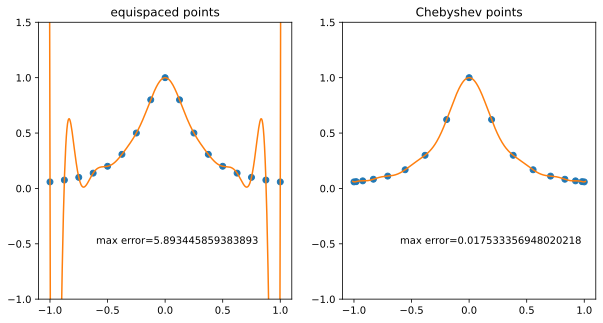

In [20]:
N = 16
xx = linspace(-1.01,1.01,400,True)
figure(figsize=(10,5))
for i in range(2):
    if i==0:
        s = 'equispaced points'; x = -1.0 + 2.0*arange(0,N+1)/N
    if i==1:
        s = 'Chebyshev points'; x = cos(pi*arange(0,N+1)/N)
    subplot(1,2,i+1)
    u = 1.0/(1.0 + 16.0*x**2)
    uu = 1.0/(1.0 + 16.0*xx**2)
    p = polyfit(x,u,N)
    pp= polyval(p,xx)
    plot(x,u,'o',xx,pp)
    axis([-1.1, 1.1, -1.0, 1.5])
    title(s)
    error = norm(uu-pp, inf)
    text(-0.6,-0.5,'max error='+str(error))
    
    

<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Program 10 : Polynomials and corresponding equipotential curves


</font>
</div>

In [21]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
from numpy import pi,linspace,arange,abs,cos,poly,polyval,meshgrid,real,imag
from matplotlib.pyplot import figure,subplot,plot,title,axis,contour



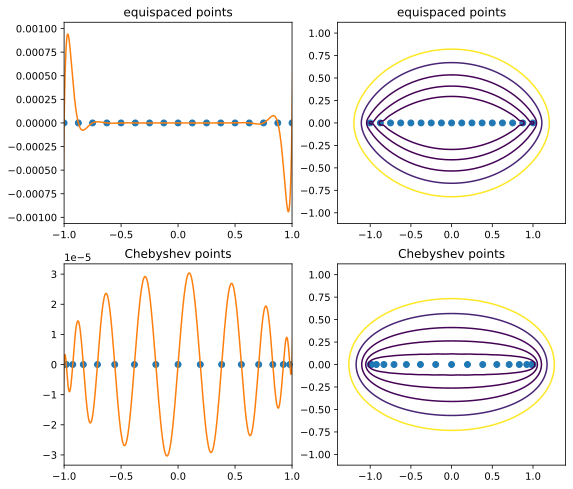

In [23]:
N = 16
figure(figsize=(9,8))
for i in range(2):
    if i==0:
        s = 'equispaced points'; x = -1.0 + 2.0*arange(0,N+1)/N
    if i==1:
        s = 'Chebyshev points'; x = cos(pi*arange(0,N+1)/N)
    p = poly(x)
    # Plot p(x)
    xx = linspace(-1.01,1.01,400,True)
    pp = polyval(p,xx)
    fig = subplot(2,2,2*i+1)
    plot(x,0*x,'o',xx,pp)
    fig.set_xlim(-1,1)
    title(s)
    
    # Plot equipotential curves
    subplot(2,2,2*i+2)
    plot(real(x),imag(x),'o')
    axis([-1.4,1.4,-1.12,1.12])
    xgrid = linspace(-1.4,1.4,250,True)
    ygrid = linspace(-1.12,1.12,250,True)
    xx,yy = meshgrid(xgrid,ygrid)
    zz = xx + 1j*yy
    pp = polyval(p,zz)
    levels = 10.0**arange(-4,1)
    contour(xx,yy,abs(pp),levels)
    title(s)
    
    

<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Program 11 : Chebyshev differentiation of a smooth function

Note: Whereas the important chebPy function is imported in the original program by CPraveen, it is printed in full here.


</font>
</div>

In [27]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
from numpy import linspace,exp,sin,dot
from matplotlib.pyplot import figure,subplot,plot,title
#from chebPy import *



In [28]:
from numpy import pi,cos,arange,ones,tile,dot,eye,diag

def cheb(N):
    '''Chebushev polynomial differentiation matrix.
       Ref.: Trefethen's 'Spectral Methods in MATLAB' book.
    '''
    x      = cos(pi*arange(0,N+1)/N)
    if N%2 == 0:
        x[N//2] = 0.0 # only when N is even!
    c      = ones(N+1); c[0] = 2.0; c[N] = 2.0
    c      = c * (-1.0)**arange(0,N+1)
    c      = c.reshape(N+1,1)
    X      = tile(x.reshape(N+1,1), (1,N+1))
    dX     = X - X.T
    D      = dot(c, 1.0/c.T) / (dX+eye(N+1))
    D      = D - diag( D.sum(axis=1) )
    return D,x



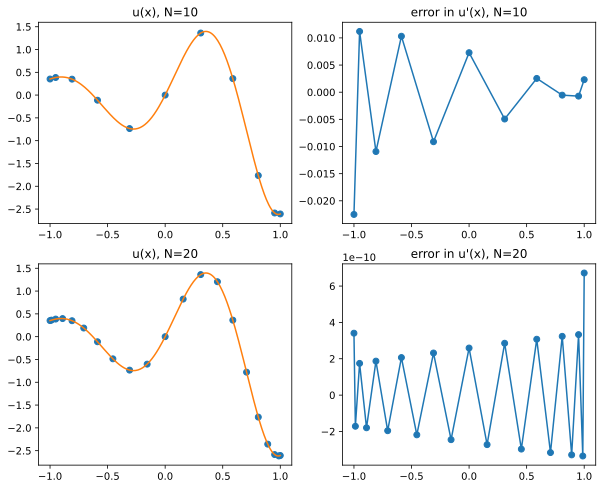

In [29]:
xx = linspace(-1.0,1.0,200,True)
uu = exp(xx)*sin(5.0*xx)
c = 1; figure(figsize=(10,8))
for N in [10,20]:
    D,x = cheb(N); u = exp(x)*sin(5.0*x)
    subplot(2,2,c); c += 1
    plot(x,u,'o',xx,uu)
    title('u(x), N='+str(N))
    
    error = dot(D,u) - exp(x)*(sin(5.0*x)+5.0*cos(5.0*x))
    subplot(2,2,c); c += 1
    plot(x,error,'o-')
    title('error in u\'(x), N='+str(N))
    
    

<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Program 12 : Accuracy of Chebyshev spectral differentiation


</font>
</div>

In [30]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
from numpy import zeros,pi,inf,linspace,arange,abs,dot,exp
from scipy.linalg import toeplitz,norm
from matplotlib.pyplot import figure,subplot,semilogy,title,xlabel,ylabel,axis,grid
#from chebPy import *



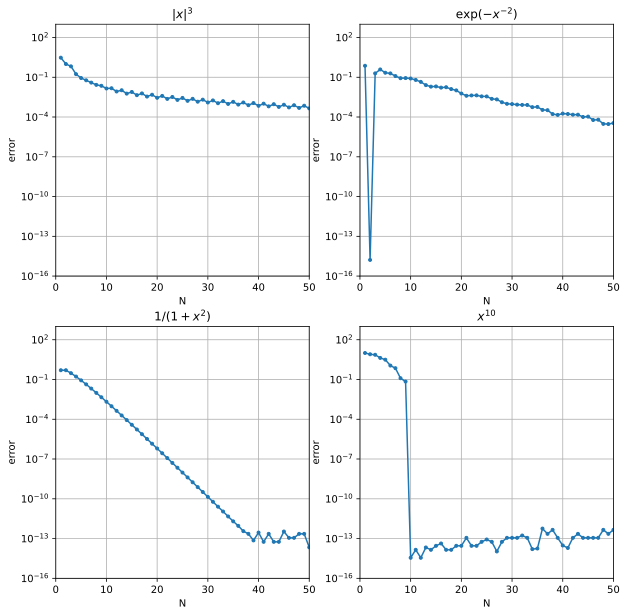

In [31]:
Nmax = 50
E = zeros((4,Nmax))
for N in range(1,Nmax+1):
    D,x = cheb(N)
    
    v = abs(x)**3          # 3rd deriv in BV
    vprime = 3.0*x*abs(x)
    E[0][N-1] = norm(dot(D,v)-vprime,inf)
    
    v = exp(-(x+1.0e-15)**(-2))   # C-infinity
    vprime = 2.0*v/(x+1.0e-15)**3
    E[1][N-1] = norm(dot(D,v)-vprime,inf)
    
    v = 1.0/(1.0+x**2)     # analytic in a [-1,1]
    vprime = -2.0*x*v**2
    E[2][N-1] = norm(dot(D,v)-vprime,inf)
    
    v = x**10
    vprime = 10.0*x**9   # polynomial
    E[3][N-1] = norm(dot(D,v)-vprime,inf)


titles = ["$|x|^3$", "$\exp(-x^{-2})$", \
          "$1/(1+x^2)$", "$x^{10}$"]
figure(figsize=(10,10))
for iplot in range(4):
    subplot(2,2,iplot+1)
    semilogy(arange(1,Nmax+1,),E[iplot][:],'.-')
    title(titles[iplot])
    xlabel('N')
    ylabel('error')
    axis([0,Nmax,1.0e-16,1.0e3])
    grid('on')
    
    

<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Program 13 : Solve linear BVP


</font>
</div>

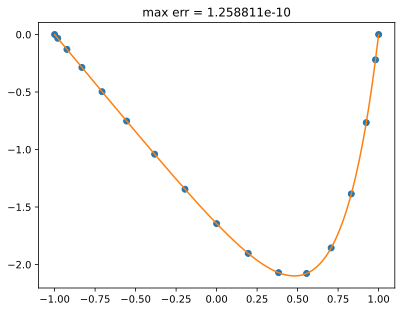

In [32]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
#from chebPy import *
from numpy import dot,exp,zeros,sinh,cosh,max,linspace,polyval,polyfit,inf
from numpy.linalg import norm
from scipy.linalg import solve
from matplotlib.pyplot import title,plot

N = 16
D,x = cheb(N)
D2 = dot(D,D)
D2 = D2[1:N,1:N]
f = exp(4.0*x[1:N])
u = solve(D2,f)
s = zeros(N+1)
s[1:N] = u

xx = linspace(-1.0,1.0,200)
uu = polyval(polyfit(x,s,N),xx)    # interpolate grid data
exact = (exp(4.0*xx) - sinh(4.0)*xx - cosh(4.0))/16.0
maxerr = norm(uu-exact,inf)

title('max err = %e' % maxerr)
plot(x,s,'o',xx,exact);



<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Program 14 : Solve nonlinear BVP


</font>
</div>

In [33]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
from numpy import dot,exp,zeros,linspace,polyval,polyfit,inf
from numpy.linalg import norm
#from chebPy import cheb
from scipy.linalg import solve
from matplotlib.pyplot import title,plot



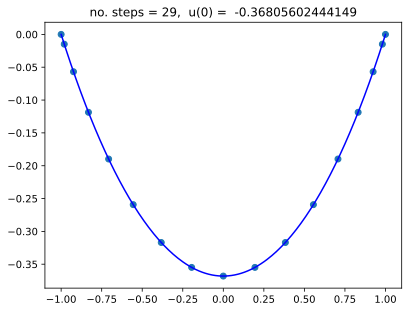

In [34]:
N = 16 # N must be even
D,x = cheb(N)
D2 = dot(D,D)
D2 = D2[1:N,1:N]

u = zeros(N-1)
err = zeros(N-1)
change, it = 1.0, 0

while change > 1.0e-15:
    unew = solve(D2,exp(u))
    change = norm(unew-u, inf)
    u = unew
    it += 1

# Add bounday values to u vector
s = zeros(N+1); s[1:N] = u; u = s;

xx = linspace(-1.0,1.0,201)
uu = polyval(polyfit(x,u,N),xx)    # interpolate grid data

title('no. steps = %d,  u(0) = %18.14f' %(it,u[N//2]) )
plot(x,u,'o',xx,uu,'b');

